In [1]:
import numpy as np
print('numpy: %s' % np.__version__)

import pandas as pd
print('pandas: %s' % pd.__version__)

from pathlib import Path

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
print('sklearn: %s' % sklearn.__version__)

from sklearn.metrics import confusion_matrix, classification_report


numpy: 1.19.2
pandas: 1.1.5
sklearn: 0.23.2


### Prework: clean data, data in 2 seperate files for train and test
### Check Columns are the SAME

In [2]:
# Display all the columns for the dataframes (not-truncated)
pd.set_option('display.max_columns', None)

In [3]:
def check_test_and_train_matching_columns(train_df, test_df):
    # Display warning if columns do not match
    inner_join = set(train_df.columns) & set(test_df.columns)
    full_join = set(train_df.columns) | set(test_df.columns)
    unmatching_columns = list(full_join - inner_join)

    if (len(unmatching_columns) != 0):
        print("Columns count does not match at...")
        return unmatching_columns
    else:
        print("Columns match!")

In [4]:
# was duplicating the index file to add "Unnamed: 0"
# still not dropping index column
train_df = pd.read_csv(Path('Resources/2019loans.csv',index=False)).drop(['Unnamed: 0'],axis=1)
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv',index=False)).drop(['Unnamed: 0'],axis=1)
check_test_and_train_matching_columns(train_df,test_df)

Columns match!


In [5]:
train_df.head()

,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [6]:
train_df.info()
# can drop the first column: is a duplicate of index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       12180 non-null  int64  
 1   loan_amnt                   12180 non-null  float64
 2   int_rate                    12180 non-null  float64
 3   installment                 12180 non-null  float64
 4   home_ownership              12180 non-null  object 
 5   annual_inc                  12180 non-null  float64
 6   verification_status         12180 non-null  object 
 7   loan_status                 12180 non-null  object 
 8   pymnt_plan                  12180 non-null  object 
 9   dti                         12180 non-null  float64
 10  delinq_2yrs                 12180 non-null  float64
 11  inq_last_6mths              12180 non-null  float64
 12  open_acc                    12180 non-null  float64
 13  pub_rec                     121

In [7]:
test_df.tail()

,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
4697,77282,30000.0,0.1240,673.42,RENT,140480.0,Source Verified,high_risk,n,15.74,0.0,0.0,20.0,0.0,23215.0,32.0,f,26196.18,26196.18,6713.53,6713.53,3803.82,2909.71,0.0,0.00,0.0000,0.00,0.0,1.0,Individual,0.0,0.0,110873.0,2.0,11.0,2.0,7.0,4.0,87658.0,82.0,0.0,5.0,11107.0,69.0,52300.0,1.0,0.0,2.0,12.0,5835.0,26178.0,45.9,0.0,0.0,95.0,103.0,15.0,4.0,2.0,15.0,2.0,0.0,6.0,7.0,8.0,8.0,20.0,9.0,10.0,7.0,20.0,0.0,0.0,0.0,2.0,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0,N,N
4698,77291,24000.0,0.0756,747.22,RENT,50000.0,Not Verified,high_risk,n,26.81,0.0,0.0,9.0,0.0,459.0,10.0,w,0.00,0.00,4526.54,4526.54,1195.80,288.56,0.0,3042.18,547.5924,0.00,1.0,1.0,Individual,0.0,84.0,18928.0,1.0,2.0,1.0,1.0,8.0,18469.0,60.0,1.0,2.0,0.0,30.0,31600.0,0.0,0.0,0.0,3.0,2103.0,13300.0,0.0,0.0,0.0,45.0,49.0,5.0,5.0,0.0,19.0,18.0,0.0,0.0,2.0,2.0,2.0,3.0,7.0,7.0,2.0,9.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0,N,N
4699,77292,10000.0,0.2305,387.36,RENT,33000.0,Verified,high_risk,n,38.51,0.0,2.0,7.0,0.0,6342.0,13.0,f,0.00,0.00,2685.91,2685.91,1534.41,1151.50,0.0,0.00,0.0000,0.00,0.0,1.0,Individual,0.0,0.0,33022.0,2.0,3.0,3.0,5.0,3.0,26680.0,90.0,2.0,3.0,5901.0,76.0,13700.0,2.0,0.0,3.0,8.0,5504.0,2599.0,69.4,0.0,0.0,88.0,62.0,10.0,3.0,0.0,11.0,5.0,0.0,1.0,2.0,1.0,3.0,7.0,3.0,6.0,2.0,7.0,0.0,0.0,0.0,5.0,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0,N,N
4700,77297,8000.0,0.1862,205.86,RENT,38000.0,Source Verified,high_risk,n,16.36,0.0,1.0,8.0,1.0,11636.0,20.0,w,0.00,0.00,2075.44,2075.44,185.00,416.03,0.0,1474.41,265.3938,205.86,0.0,1.0,Individual,0.0,0.0,19595.0,3.0,1.0,0.0,1.0,15.0,7959.0,82.0,2.0,3.0,416.0,63.0,21500.0,1.0,5.0,1.0,5.0,2449.0,1084.0,27.7,0.0,0.0,121.0,100.0,2.0,2.0,0.0,26.0,5.0,1.0,1.0,5.0,1.0,7.0,5.0,6.0,13.0,5.0,8.0,0.0,0.0,0.0,3.0,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0,N,N
4701,77304,30000.0,0.2055,1123.34,RENT,180000.0,Source Verified,high_risk,n,12.06,0.0,0.0,8.0,0.0,4771.0,24.0,f,28770.38,28770.38,5582.45,5582.45,1229.62,4352.83,0.0,0.00,0.0000,1123.34,0.0,1.0,Individual,0.0,3835.0,209389.0,0.0,3.0,1.0,1.0,9.0,204618.0,62.0,0.0,2.0,1650.0,61.0,8700.0,2.0,0.0,2.0,3.0,26174.0,1768.0,68.4,0.0,0.0,178.0,37.0,19.0,9.0,0.0,19.0,9.0,0.0,3.0,5.0,3.0,3.0,18.0,5.0,5.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,218686.0,209389.0,5600.0,209986.0,N,N


In [8]:
test_df.info()
# can drop the first column: is a duplicate of info: happened when grabbing the files

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       4702 non-null   int64  
 1   loan_amnt                   4702 non-null   float64
 2   int_rate                    4702 non-null   float64
 3   installment                 4702 non-null   float64
 4   home_ownership              4702 non-null   object 
 5   annual_inc                  4702 non-null   float64
 6   verification_status         4702 non-null   object 
 7   loan_status                 4702 non-null   object 
 8   pymnt_plan                  4702 non-null   object 
 9   dti                         4702 non-null   float64
 10  delinq_2yrs                 4702 non-null   float64
 11  inq_last_6mths              4702 non-null   float64
 12  open_acc                    4702 non-null   float64
 13  pub_rec                     4702 

In [9]:
# index is a column, don't want as a feature so remove from test and train
# delete column without having to reassign dataFrame
# df.drop('column_name', axis=1, inplace=True)
train_df.drop('index', axis=1, inplace=True)
test_df.drop('index', axis=1, inplace=True)

In [10]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [11]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


### Review some of the data we have:

In [13]:
# some of our key X value, and loan amount , home_ownership, annual_inc see if balanced
# our y value: loan_status. : particularly high_risk (known label)
# not sure of any exact specifications, so keep all as is (review notes in readme.md)
train_df['loan_status'].value_counts()

high_risk    6090
low_risk     6090
Name: loan_status, dtype: int64

In [14]:
'''
loan_amt value counts
10000.0    1042
20000.0     695
15000.0     588
40000.0     580
12000.0     466
           ... 
23050.0       1
17050.0       1
30050.0       1
6650.0        1
35325.0       1

home_ownership value counts:
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65


annual_inc value counts:
60000.0     423
75000.0     390
65000.0     388
80000.0     368
50000.0     366
           ... 
36465.0       1
111843.0      1
63092.0       1
76980.0       1
46080.0       1

loan_status:
low_risk     6090
high_risk    6090

'''

'\nloan_amt value counts\n10000.0    1042\n20000.0     695\n15000.0     588\n40000.0     580\n12000.0     466\n           ... \n23050.0       1\n17050.0       1\n30050.0       1\n6650.0        1\n35325.0       1\n\nhome_ownership value counts:\nMORTGAGE    5800\nRENT        4944\nOWN         1371\nANY           65\n\n\nannual_inc value counts:\n60000.0     423\n75000.0     390\n65000.0     388\n80000.0     368\n50000.0     366\n           ... \n36465.0       1\n111843.0      1\n63092.0       1\n76980.0       1\n46080.0       1\n\nloan_status:\nlow_risk     6090\nhigh_risk    6090\n\n'

### Preprocessing Data

In [15]:
# Convert categorical data to numeric (where object to numeric -> get_dummies) and separate target feature(X) 
# Want dummies for all categorical (sometimes using one-hot-key could use individually to make categorical values)
#For training data
y_train = LabelEncoder().fit_transform(train_df['loan_status'])
#train_df['Label'] = LabelEncoder().fit_transform(train_df['loan_status'])

'''
i  Label	loan_status
0	1	   low_risk
1	1	   low_risk
2	1	   low_risk
3	1	   low_risk
12175	0	high_risk
12176	0	high_risk
12177	0	high_risk
12178	0	high_risk
12179	0	high_risk

'''

'\ni  Label\tloan_status\n0\t1\t   low_risk\n1\t1\t   low_risk\n2\t1\t   low_risk\n3\t1\t   low_risk\n12175\t0\thigh_risk\n12176\t0\thigh_risk\n12177\t0\thigh_risk\n12178\t0\thigh_risk\n12179\t0\thigh_risk\n\n'

In [16]:
# want to set the high and low risk columns for y, labels as dict
X_train = train_df.drop(columns = ["loan_status"])   # remove the y label
X_train = pd.get_dummies(X_train)  # converts all categorical data to numeric

In [17]:
X_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0


In [18]:
print(y_train)
# low risk = 1
# high risk = 0
print(len(y_train))
print(len(X_train))
print(X_train.shape, y_train.shape)

[1 1 1 ... 0 0 0]
12180
12180
(12180, 92) (12180,)


In [19]:
# Convert categorical data to numeric and separate target feature 
# For testing data
y_test = LabelEncoder().fit_transform(test_df['loan_status'])
X_test = test_df.drop(columns = ["loan_status"])
X_test = pd.get_dummies(X_test)
X_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1


In [20]:
print(y_test)
# low risk = 1
# high risk = 0
print(len(y_test))
print(len(X_test))
print(X_test.shape, y_test.shape)
# can see that the y_test is missing one of the dummy columns because the shape has 91 col. rather than 92

[1 1 1 ... 0 0 0]
4702
4702
(4702, 91) (4702,)


In [21]:
# add missing dummy variables to testing set
# find any missing column
check_test_and_train_matching_columns(X_train, X_test)

Columns count does not match at...


['debt_settlement_flag_Y']

In [22]:
# set the missing value for the column debt_settlement_flag_N=1 , debt_settlement_flag_Y=0
# add the column with the value of 0, then check the head and/or shape
X_test['debt_settlement_flag_Y'] = 0

In [23]:
X_test.shape

(4702, 92)

In [24]:
X_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0


### Prediction - Unscaled Data 

Prediction UNSCALED Data:
Random Forest Classifier should perform better than Logistic Regression because the dataset consists of categorical data, which tends to work best with Random Forest models. Logistic Regression, on the other hand, performs best with linearly separable datasets.

https://scholar.smu.edu/cgi/viewcontent.cgi?article=1041&context=datasciencereview#:~:text=In%20general%2C%20logistic%20regression%20performs,variables%20increases%20in%20a%20dataset.

About the models: 
- Logistic Regression is a classification algorithm used to predict a discrete set of classes or categories. (ie:yes/no or true/false)
It uses the sigmoid function to return a probability 'value'. 

- Random Forest Classifier is an ensemble learning method that constructs a set of decision trees from a randomly selected subset of training set and combines them together to return a 'prediction'. 
------------


### Logistic regression model - unscaled

In [25]:
# Train the Logistic Regression model on the unscaled data and print the model score
reg_classifier = LogisticRegression()
reg_classifier


LogisticRegression()

In [26]:
# gives same warnings
# trouble converging may be because #'s not scaled
# adjusted values so can converge
reg_classifier = LogisticRegression(
    #solver='lbfgs',     # non linear data, not working as well
    solver='liblinear',  # generally better on data with linear relationships, small datasets
    #max_iter=1000,   #train loop to opti,# times happens
    random_state=0
    #stop criteria test various
    #tol = .01
)


In [27]:
reg_classifier.fit(X_train, y_train)
print(f"Training Data Score: {reg_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {reg_classifier.score(X_test, y_test)}")

# logistic 

Training Data Score: 0.707471264367816
Testing Data Score: 0.5746490854955338


### Random Forest - Unscaled

In [260]:
# Train a Random Forest Classifier model and print the model score
# trial and error with 50 dflt, smaller dataset 300 ok because not as time consuming, take a long time to train
# large datasets 50 could take a long time 
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=200).fit(X_train, y_train)
print(f'Training Score RF: {rf_classifier.score(X_train, y_train)}')
print(f'Testing Score RF: {rf_classifier.score(X_test, y_test)}')

# Looks to be overfitted because 1.0 in training
# accuracy formula (tp + tn)/(tp+tn+fn+fp)

Training Score RF: 1.0
Testing Score RF: 0.638664398128456


## Results - Unscaled (compare to preciction)

#### Logistic Regression (LR):
- Training Data Score: 0.707471264367816
- Testing Data Score: 0.5746490854955338

#### Random Forest Classifier (RF):
- Training Score RF: 1.0
- Testing Score RF: 0.638664398128456

The Random Forest Classifier model did better when both models were not scaled. Although, it looks to be overfitted in training. The complexity may need to be reduced. 
This was the predicted case because we are using categorical data which works well with Random Forest Classifier. Alternatively, Logistic Regression, on the other hand, performs best with linearly separable datasets. 


### Prediction - Scaled Data 
Random Forest Classifier SCALING should not make a difference to the Random Forest. 
Scaling is only needed to be done for distance based algorithms. 
For tree based algorithms (DecisionTrees), scaling is not required.
- https://www.kaggle.com/questions-and-answers/86923
- https://www.sciencedirect.com/topics/engineering/random-forest
    
Thus, Logistic Regression, if scaled out, may do better in this case, than the random-forest. 
- The Testing score for LR:  0.5746490854955338  (will change)
- The Testing score for RF:  0.638664398128456   (will not change much)

Because the values are somewhat close, and the RF values should not change much, I am estimating that Linear regression may do better. 
(Feature scaling can matter because coefficients of features with large variance are small and thus less penalized.)


- https://scholar.smu.edu/cgi/viewcontent.cgi?article=1041&context=datasciencereview#:~:text=In%20general%2C%20logistic%20regression%20performs,variables%20increases%20in%20a%20dataset.

- https://www.quora.com/How-does-feature-scaling-affect-logistic-regression-model

### Scale DATA

In [28]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Scaled Logistic Regression

In [29]:
# Train the Logistic Regression model on the scaled data and print the model score
scaled_LR_clf = LogisticRegression(solver='liblinear',random_state=0 ).fit(X_train_scaled, y_train)
print(f"Training Data Score: {scaled_LR_clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {scaled_LR_clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.7078817733990148
Testing Data Score: 0.7677584006805614


In [30]:
# confusion matrix scaled LR
y_true = y_test
y_pred = scaled_LR_clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

#confusion_matrix
#tn, fp, 
#fn, tp 

array([[1788,  563],
       [ 529, 1822]])

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

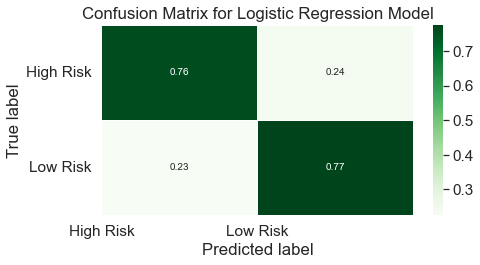

In [32]:
# show on a plot
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,3.5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
#class_names = ['Low Risk', 'High Risk']
class_names = ['High Risk', 'Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

#### The Confusion Matrix above shows that the Logistic Regression model struggled a bit more at predicting the High Risk label, but overall predicted both labels equally well. A balanced model.

Depending on the the business decision, one can try to improve on the scores.

##### False-negative 
- One would see predicted High Risk (label) in 529 cases (23%), but these clients are actually Low Risk.
- It is not as detrimental to turn away low risk clients, who do actually qualify. Thus, one might keep this number as it is or it can be higher if reducing the False-Positive.

##### False-Positive
- One would see predicted Low Risk (label) in 563 cases (24%), but these clients are actually High Risk.
- It may be more detrimental to accept loans from these clients labelled low risk, but they are actually high risk. Thus, one might want to minimize this number.

Thus, with a balanced model, trying to improve one score will offset another. 
It may be better to lower the False-Positive scores. 
                              
 

In [33]:
# Classification Report  
# low risk = 1
# high risk = 0
target_names = ['high risk', 'low risk']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   high risk       0.77      0.76      0.77      2351
    low risk       0.76      0.77      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702



#### The above classification report shows that precision (accuracy) for high risk is 77%; the model tries to avoid labeling things “high risk” that are not high risk. On the other hand, recall (sensitivity) is a bit lower for high risk 76%, which means that the classifier is missing some 'high risks' because it is trying to be too careful. Because precision and recall are both similar, F1 score is also similar at 77%.

High risk and low risk clients are almost equally being turned away for a loan at the same rate because the numbers almost equally match. 


Suggested Model: Minimize the high risk false positives. In turn the balance will be offset. Although, it may not be as detrimental to the lending facility.

#### Scaled Random Forest

In [34]:
# Train a Random Forest Classifier model on the scaled data and print the model score
scaled_rf_cls = RandomForestClassifier(random_state=42, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Training Score RF: {scaled_rf_cls.score(X_train_scaled, y_train)}')
print(f'Testing Score RF: {scaled_rf_cls.score(X_test_scaled, y_test)}')

Training Score RF: 1.0
Testing Score RF: 0.6376010208421948


In [35]:
# Confusion matrix for RF model
y_true2 = y_test
y_pred2 = scaled_rf_cls.predict(X_test_scaled)
confusion_matrix(y_true2, y_pred2)
# fn 1225

array([[1872,  479],
       [1225, 1126]])

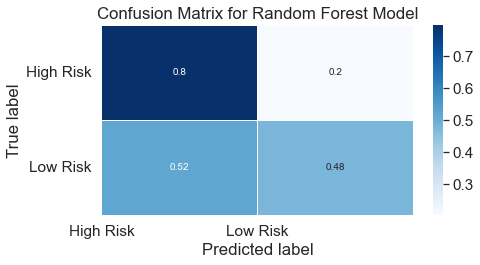

In [36]:
# show on a plot
matrix = confusion_matrix(y_true2, y_pred2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,3.5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
#class_names = ['Low Risk', 'High Risk']
class_names = ['High Risk', 'Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
# high tp  tneg
# low tp   tneg

#### The above Confusion Matrix shows that the Random Forest classifier struggled at predicting the Low Risk label. 

The algorithm is good for high risk at 80%, but struggles for the low risk at 52%

The way forward would be to exclusively explore the low risk (as a subset of only low risks, pair plot them)
This way one can see different feature sets. 
There is a struggle in the classification of this class, algorithm clustering, ie) DBSCAN, may be able to identify the noisy data from this class, low risk. 

* Because there is a lot of noise in this low risk class, scaling the Random Forest did not help. 


In [37]:
# Classification Report for Random Forest model
print(classification_report(y_true2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

   high risk       0.60      0.80      0.69      2351
    low risk       0.70      0.48      0.57      2351

    accuracy                           0.64      4702
   macro avg       0.65      0.64      0.63      4702
weighted avg       0.65      0.64      0.63      4702



#### Ideally one would like precision, recall, and F1 to all be high. This would show a balanced model. 

* The high risk precision is 60% accurate (40% false positive - THIS IS HIGH), but the recall is 80%. When the recall (sensitivity) is high this is good. This means that most of those captured as high risk (60%), most instances are being  marked as correct (80% of the time). 

* The low risk accuracy is 70% (false negatives at 30%). However, the recall (sensitivity) is at 48%. This means that only 48% are correctly being marked as low risk.  

Thus, the scaled logistic regression model, with a balanced model, is a better choice model. 


## Results - Scaled (compare to preciction)

#### NOT SCALED Logistic Regression (LR):
- Training Data Score: 0.707471264367816
- Testing Data Score: 0.5746490854955338

#### NOT SCALED Random Forest Classifier (RF):
- RF Training Score RF: 1.0
- RF Testing Score RF: 0.638664398128456


#### Scaled Logistic Regression (LR):
- Training Data Score: 0.7078817733990148
- Testing Data Score: 0.7677584006805614

#### Scaled Random Forest Classifier (RF):
- RF Training Score RF: 1.0
- RF Testing Score RF: 0.6376010208421948


- Overall, scaling greatly improved the score of the Logistic Regression model from 0.5746490854955338 to 0.7677584006805614 so that it outperformed the Random Forest model. The scaled Logistic Regression model was shown to be more balanced. This shows that sometimes a simple model with scaled data can be a better fit than one with more complexity.


- This is what was predicted. The overfitting of the Random Forest Classifier model, and the fact that it does not change much with scaling, and in this case did not impove the score. The Random Forest Classifier model was shown to be unbalanced and having too much noise in the low risk category. Whereas, the scaling of the Logistic Regression model helped to 'normalize' the data. 


- Scaling for Logistic Regression:
The implementation of logistic regression you use has a penalty on coefficent size (L1 or L2 norm). In this case, feature scaling matters, because coefficients of features with large variance are small and thus less penalized.
Balance the importance of each feature. For example, if you have two independent variables in different ranges [1, 2] and [1000, 2000] and you didn’t scale, then it’s likely the latter variables are considered dominent
- https://www.quora.com/How-does-feature-scaling-affect-logistic-regression-model


- One can move forward:
Exclusively explore the low risk (as a subset of only low risks, pair plot them)
This way one can see different feature sets. 
There is a struggle in the classification of this class, algorithm clustering, ie) DBSCAN, may be able to identify the noisy data from this class, low risk. 